## Regression Analysis

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
x = np.array([5,15,25,35,45,55])
y = np.array([5,20,14,32,22,38])

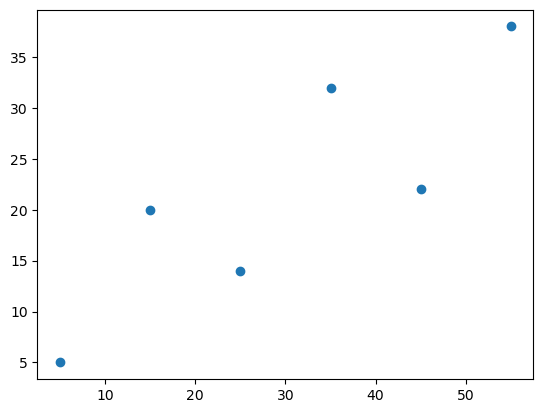

In [8]:
plt.scatter(x,y)

- The first condition to build linear regression model about data linearity is true

In [9]:
np.corrcoef(x,y)

array([[1.        , 0.84609433],
       [0.84609433, 1.        ]])

- The second condition about correlation is true

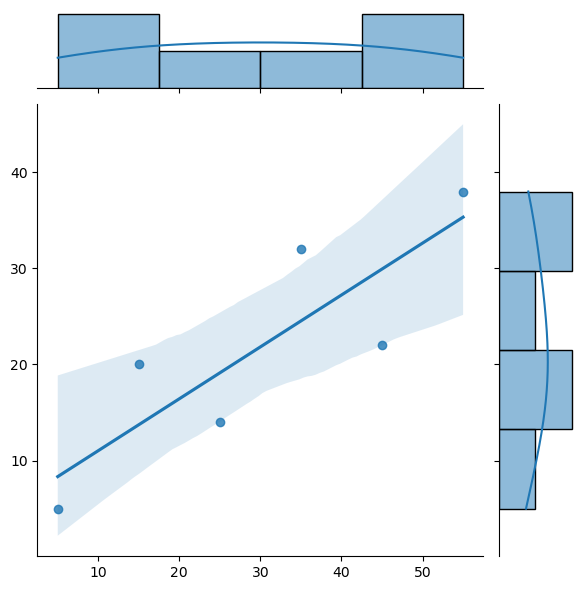

In [11]:
sns.jointplot(x=x,y=y,kind="reg")

- The line is your `regression line`and the shaded area is `Confidence interval` for regression line, also you will find the distribution for the data 

In [20]:
X= x.reshape(-1,1)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
reg_model = LinearRegression()

In [16]:
reg_model.fit(X,y)

LinearRegression()

In [19]:
y_pred = reg_model.predict(X)

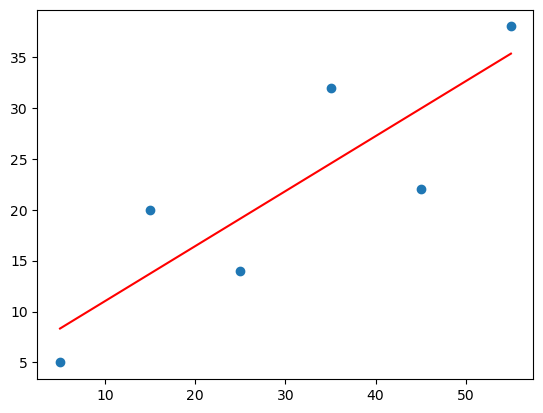

In [22]:
plt.scatter(X,y)
plt.plot(X,y_pred,'r-')

In [18]:
# R**2
reg_model.score(x.reshape(-1,1),y)

0.7158756137479542

In [23]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.7158756137479542

In [26]:
# intercept point
b = reg_model.intercept_

In [27]:
# coefficient 
a = reg_model.coef_

In [34]:
# With linear regression equation
y_predict = a*x+b

In [32]:
y_predict

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

In [33]:
y_pred

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

<Axes: ylabel='Count'>

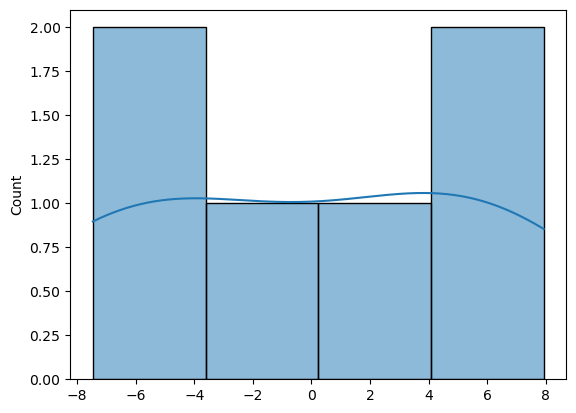

In [35]:
# residual (error)
res = y_pred - y
sns.histplot(res,kde=True)

- Because the data is very small , you can not determine if the error is normal distribution or not.
- You can use `displot` to can estimate the distribution for it.

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


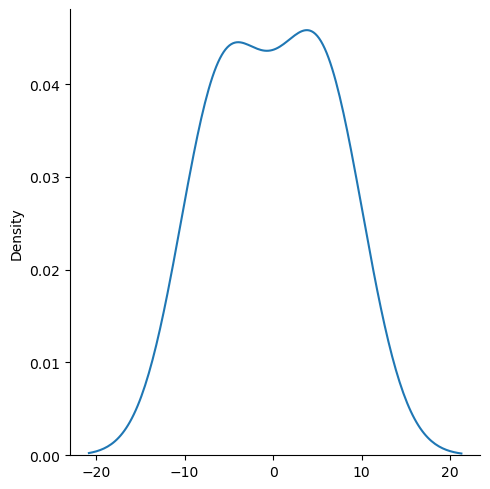

In [36]:
sns.displot(res,kind='kde')

- Now we can see that the residual is almost normal
- One of assumption of simple linear regression model is that the distribution of error is normal.

In [37]:
x = np.array([(0,1),
              (5,1),
              (15,2),
              (25,5),
              (35,11)
              ,(45,14)
              ,(55,34)
              ,(60,35)])

In [38]:
x

array([[ 0,  1],
       [ 5,  1],
       [15,  2],
       [25,  5],
       [35, 11],
       [45, 14],
       [55, 34],
       [60, 35]])

In [39]:
y = [4,5,20,14,32,22,38,43]

In [63]:
data = pd.DataFrame(x,columns=['x1','x2'])
data['y'] = y

In [64]:
data

,x1,x2,y
0,0,1,4
1,5,1,5
2,15,2,20
3,25,5,14
4,35,11,32
5,45,14,22
6,55,34,38
7,60,35,43


c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


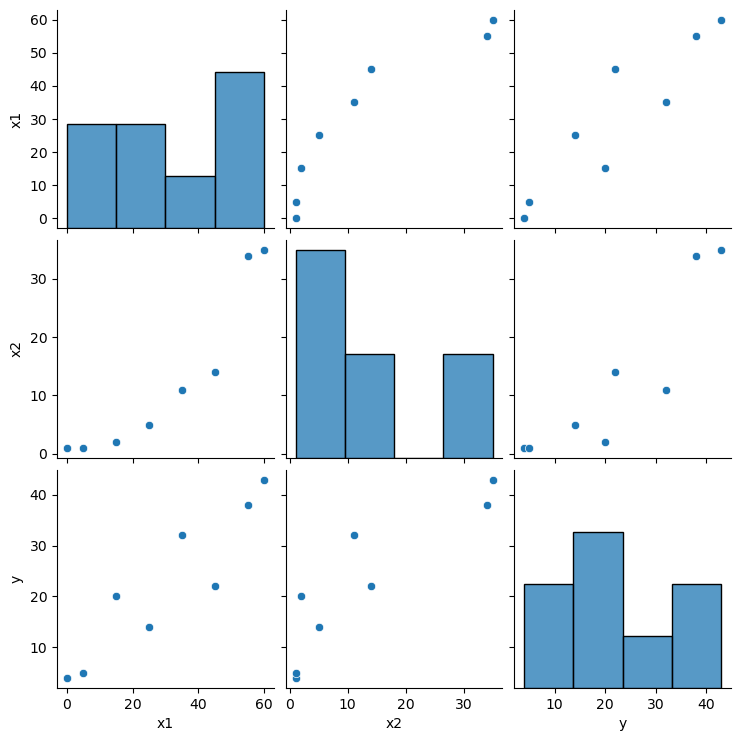

In [65]:
sns.pairplot(data)

We can notice that :
- There is relationship between x1,x2 - this must be fix to can make linear regression model but we will not do that for now.
- between x2,y : the values of x2 is not normal distribution, this may happen because the data is very small.  

In [40]:
reg_model.fit(x,y)

LinearRegression()

In [41]:
reg_model.intercept_

5.638754756539466

In [42]:
reg_model.coef_

array([0.43311542, 0.28099283])

In [43]:
y_pred = reg_model.predict(x)

c:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


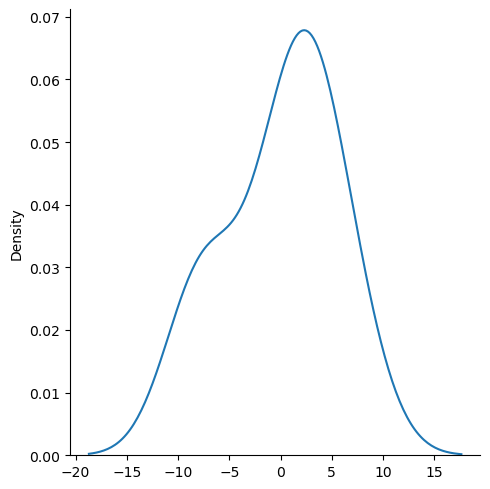

In [49]:
# residual (error)
res = y_pred - y
sns.displot(res,kind='kde')

In [57]:
r2_score(y,y_pred)

0.8642329279774473

Let's try to make the predication using statistical models

In [50]:
import statsmodels.api as sm

In [51]:
X = sm.add_constant(x)

In [52]:
X

array([[ 1.,  0.,  1.],
       [ 1.,  5.,  1.],
       [ 1., 15.,  2.],
       [ 1., 25.,  5.],
       [ 1., 35., 11.],
       [ 1., 45., 14.],
       [ 1., 55., 34.],
       [ 1., 60., 35.]])

In [53]:
sm_model = sm.OLS(y,X)

In [54]:
results =  sm_model.fit()

In [55]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     15.91
Date:                Wed, 03 Apr 2024   Prob (F-statistic):            0.00679
Time:                        22:27:47   Log-Likelihood:                -24.239
No. Observations:                   8   AIC:                             54.48
Df Residuals:                       5   BIC:                             54.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6388      4.357      1.294      0.2

c:\Users\Administrator\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


- We could notice that:
>  - r2-square using statistical model equal to r2-square using ml model.
>  -  Prop (F-statistics) is very low > 0.05 , so we can reject H0 which say that R2-square = 0. also we can say that R2-square is significant for the population.Also we can say the same for coefficients.
>  - For coef: confidence interval for 3 coef includes 0 , so it affects Pvalue and make it not small enough to be significant

Let's try another more bigger dataset and see if the coef will be significant or not

In [58]:
df = pd.read_csv('melb_data.csv')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [60]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [83]:
df = df.drop(['Date','Address','Suburb','Type','Method','SellerG','CouncilArea','Regionname'],axis=1)

In [84]:
df

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.79960,144.99840,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.80790,144.99340,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.80930,144.99440,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,-37.79690,144.99690,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.80720,144.99410,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,3150.0,4.0,2.0,2.0,652.0,NaN,1981.0,-37.90562,145.16761,7392.0
13576,3,1031000.0,6.8,3016.0,3.0,2.0,2.0,333.0,133.0,1995.0,-37.85927,144.87904,6380.0
13577,3,1170000.0,6.8,3016.0,3.0,2.0,4.0,436.0,NaN,1997.0,-37.85274,144.88738,6380.0
13578,4,2500000.0,6.8,3016.0,4.0,1.0,5.0,866.0,157.0,1920.0,-37.85908,144.89299,6380.0


In [111]:
df = df.dropna()

In [114]:
X = df.drop(['Price'],axis=1).values

In [113]:
X.isnull().value_counts()

Rooms  Distance  Postcode  Bedroom2  Bathroom  Car    Landsize  BuildingArea  YearBuilt  Lattitude  Longtitude  Propertycount
False  False     False     False     False     False  False     False         False      False      False       False            6830
Name: count, dtype: int64

In [115]:
X

array([[ 2.0000000e+00,  2.5000000e+00,  3.0670000e+03, ...,
        -3.7807900e+01,  1.4499340e+02,  4.0190000e+03],
       [ 3.0000000e+00,  2.5000000e+00,  3.0670000e+03, ...,
        -3.7809300e+01,  1.4499440e+02,  4.0190000e+03],
       [ 4.0000000e+00,  2.5000000e+00,  3.0670000e+03, ...,
        -3.7807200e+01,  1.4499410e+02,  4.0190000e+03],
       ...,
       [ 3.0000000e+00,  6.8000000e+00,  3.0160000e+03, ...,
        -3.7859270e+01,  1.4487904e+02,  6.3800000e+03],
       [ 4.0000000e+00,  6.8000000e+00,  3.0160000e+03, ...,
        -3.7859080e+01,  1.4489299e+02,  6.3800000e+03],
       [ 4.0000000e+00,  6.3000000e+00,  3.0130000e+03, ...,
        -3.7811880e+01,  1.4488449e+02,  6.5430000e+03]])

In [116]:
y = df.iloc[:,1].values

In [117]:
y

array([1035000., 1465000., 1600000., ..., 1031000., 2500000., 1285000.])

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In machine learning :

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [123]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [124]:
r2_score(y_train,y_pred_train)

0.5939186672216903

In [125]:
r2_score(y_test,y_pred_test)

0.5947872802556379

With statistical model

In [128]:
X_train=sm.add_constant(x_train)
s_model = sm.OLS(y_train,X_train)
results = s_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     581.1
Date:                Wed, 03 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:33:08   Log-Likelihood:                -68688.
No. Observations:                4781   AIC:                         1.374e+05
Df Residuals:                    4768   BIC:                         1.375e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.36e+08   9.36e+06    -14.525      0.0

- This summary for training only, 
because we dropped some features, this affects the results as x4,x12 not statistically significance but all the other coefs are statistically significance.

In [129]:
X_test = sm.add_constant(x_test)
r_pred_test = results.predict(X_test)

In [131]:
r2_score(y_test,y_pred_test)

0.5947872802556379

<Axes: ylabel='Count'>

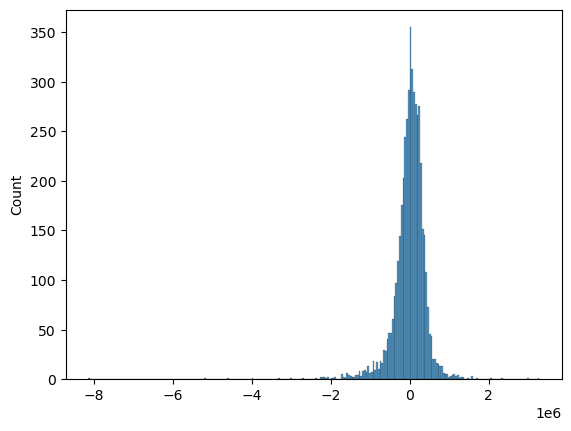

In [132]:
# check the normality of residual
X_train = sm.add_constant(x_train)
y_pred_train = results.predict(X_train)
res = y_pred_train-y_train 
sns.histplot(res)


- Error is normal distribution